# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
# Test carried out with small no of random city
#cities=cities[:20]
#print(f'{cities}')

In [3]:
print(f'{len(cities)}')

616


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# set up lists to hold reponse info
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# Hold the name of not found city 
cityna=[]
# Begin the log of data retrival
print(f"Beginning Data Retrieval\n---------------")
# Loop through the list of cities and perform a request for data on each  
j=1
i=0

for city in cities:
    
    try:
        # Build query URL
        url=f'{base_url}&appid={api_key}&q={city}&units={units}'
        # Get weather data
        wx_data=requests.get(url).json() 
        # Print the log data
        print(f'Processing Record {i} of Set {j} | {wx_data["name"]}')
        # Add or store data to place holder
        cloud.append(wx_data["clouds"]["all"])
        country.append(wx_data["sys"]["country"])
        date.append(wx_data["dt"])
        humidity.append(wx_data["main"]["humidity"])
        lat.append(wx_data["coord"]["lat"])
        lng.append(wx_data["coord"]["lon"])
        max_temp.append(wx_data["main"]["temp_max"])
        wind_speed.append(wx_data["wind"]["speed"])
    
    except KeyError:
        # Add name of not found city
        cityna.append(city)
        # Print the log data
        print("City not found, Skipping...")
        #del cities[n]
    # Number increament of Data set
    i+=1
    if i < 50:
        j=j
    else:
        j+=1
        i=0
              

Beginning Data Retrieval
---------------
Processing Record 0 of Set 1 | Bluff
Processing Record 1 of Set 1 | Vaini
Processing Record 2 of Set 1 | Jamestown
Processing Record 3 of Set 1 | Barrow
Processing Record 4 of Set 1 | Albany
City not found, Skipping...
Processing Record 6 of Set 1 | Voyvozh
Processing Record 7 of Set 1 | Port Hawkesbury
Processing Record 8 of Set 1 | Kahului
Processing Record 9 of Set 1 | Saint-Philippe
Processing Record 10 of Set 1 | Havre
Processing Record 11 of Set 1 | Muzhi
Processing Record 12 of Set 1 | Severo-Kurilsk
Processing Record 13 of Set 1 | Chokurdakh
Processing Record 14 of Set 1 | Dandong
Processing Record 15 of Set 1 | Punta Arenas
Processing Record 16 of Set 1 | Batagay-Alyta
Processing Record 17 of Set 1 | Busselton
Processing Record 18 of Set 1 | Taligaman
Processing Record 19 of Set 1 | Tuatapere
Processing Record 20 of Set 1 | Longyearbyen
Processing Record 21 of Set 1 | Ushuaia
Processing Record 22 of Set 1 | Verkhnevilyuysk
Processing Re

Processing Record 7 of Set 5 | Haimen
City not found, Skipping...
Processing Record 9 of Set 5 | Vanimo
Processing Record 10 of Set 5 | Byron Bay
Processing Record 11 of Set 5 | Kununurra
Processing Record 12 of Set 5 | Salalah
Processing Record 13 of Set 5 | Gat
Processing Record 14 of Set 5 | Ilulissat
Processing Record 15 of Set 5 | Shingu
Processing Record 16 of Set 5 | Cocal
Processing Record 17 of Set 5 | Kumo
Processing Record 18 of Set 5 | Garowe
Processing Record 19 of Set 5 | Walvis Bay
Processing Record 20 of Set 5 | Cabo San Lucas
Processing Record 21 of Set 5 | Coracora
Processing Record 22 of Set 5 | Pangnirtung
Processing Record 23 of Set 5 | Ponta do Sol
Processing Record 24 of Set 5 | Vostok
Processing Record 25 of Set 5 | Husavik
Processing Record 26 of Set 5 | Praia
Processing Record 27 of Set 5 | Faanui
Processing Record 28 of Set 5 | Resistencia
Processing Record 29 of Set 5 | Port Alfred
Processing Record 30 of Set 5 | Brae
Processing Record 31 of Set 5 | Egvekino

Processing Record 14 of Set 9 | Correntina
Processing Record 15 of Set 9 | Zyryanka
Processing Record 16 of Set 9 | Namatanai
Processing Record 17 of Set 9 | Umea
Processing Record 18 of Set 9 | Narsaq
Processing Record 19 of Set 9 | Uyemskiy
Processing Record 20 of Set 9 | Paris
Processing Record 21 of Set 9 | Ambilobe
Processing Record 22 of Set 9 | Pula
Processing Record 23 of Set 9 | Phan Thiet
City not found, Skipping...
Processing Record 25 of Set 9 | Taoudenni
Processing Record 26 of Set 9 | Bozuyuk
Processing Record 27 of Set 9 | Ryotsu
Processing Record 28 of Set 9 | Tyrma
City not found, Skipping...
Processing Record 30 of Set 9 | Great Yarmouth
Processing Record 31 of Set 9 | Padang
Processing Record 32 of Set 9 | Dubti
Processing Record 33 of Set 9 | Ahipara
Processing Record 34 of Set 9 | Polovinnoye
Processing Record 35 of Set 9 | Chernyshevskiy
Processing Record 36 of Set 9 | Lorengau
Processing Record 37 of Set 9 | Alvaraes
Processing Record 38 of Set 9 | Bintulu
Proces

In [5]:
# Check arry length
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   616
Cloudiness   556
Country 556
Date   556
Humidity   556
Lat   556
Lng   556
max_temp   556
wind_speed   556


In [6]:
# Remove City name not having response data
for delcity in cityna:
    i=0    
    for city in cities:
        if city == delcity:
            del cities[i]
            i+=1
        else:
            i+=1
# Check arry length  
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   556
Cloudiness   556
Country 556
Date   556
Humidity   556
Lat   556
Lng   556
max_temp   556
wind_speed   556


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, Cloudiness, Country, Date, Humidity, latitude, Longitude, Max Temp and Win Speed.
weather_dict = {
    "City": cities,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weather_dict)
# Delete any unwanted null value
weather_data=weather_data.dropna(how="any")
# Save all data in a csv file
weather_data.to_csv(output_data_file, index=None, header=True)
# Show data head
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,Lng,Max Temp,Wind Speed
0,bluff,8,AU,1552963712,66,-23.58,149.07,87.73,4.41
1,vaini,0,IN,1552960800,37,15.34,74.49,69.80,2.62
2,jamestown,64,AU,1552963663,84,-33.21,138.60,77.38,5.41
3,barrow,12,AR,1552963706,77,-38.31,-60.23,51.64,6.42
4,albany,20,US,1552963662,68,42.65,-73.75,30.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

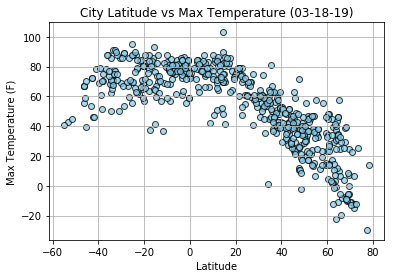

In [8]:
# Latitude vs. Temperature Plot
lat=weather_data[["lat"]]
temp=weather_data[["Max Temp"]]
plt.scatter(lat, temp, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black",label="Temp")
#plt.axis([x_min,x_max,y_min,y_max])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save the figure
plt.savefig("image\MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

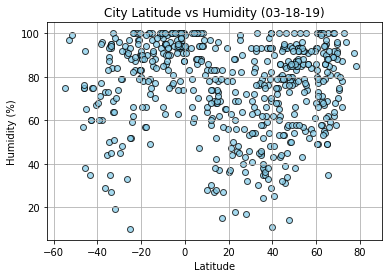

In [9]:
# Latitude VS Humidity
lat=weather_data[["lat"]]
hum=weather_data[["Humidity"]]
plt.scatter(lat, hum, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Humidity ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("image\Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

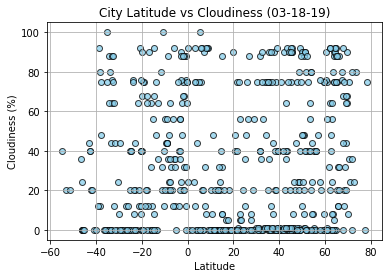

In [10]:
# Latitude VS Cloudiness

lat=weather_data[["lat"]]
cloud=weather_data[["Cloudiness"]]
plt.scatter(lat, cloud, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Cloudiness ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("image\Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

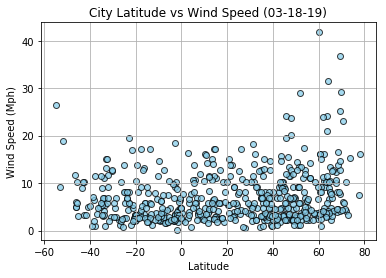

In [11]:
# Latitude VS Max Wind speed

lat=weather_data[["lat"]]
wind=weather_data[["Wind Speed"]]
plt.scatter(lat, wind, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black")
#plt.axis([-63,90,5,105])

today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Mph)")
# Save the figure
plt.savefig("image\Wind.png")

# Show plot
plt.show()

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot